# ЛР №1: Формы представления 3D данных

Реализовать различные представления 3D-модели:
- Voxel
- Point cloud
- SDF

In [3]:
%pip install git+https://github.com/marian42/mesh_to_sdf

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/marian42/mesh_to_sdf to c:\users\ansave\appdata\local\temp\pip-req-build-eei5sj34
  Resolved https://github.com/marian42/mesh_to_sdf to commit 66036a747e82e7129f6afc74c5325d676a322114
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 24.5/24.5 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 223.6/223.6 kB 2.7 MB/s eta 0:00:00
  Created wheel for mesh-to-sdf: filename=mesh_to_sdf-0.0.14-py3-none-any.whl size=14665 sha256=ec5e7630177f52ec62a62f51ef8904ba0f015dfa256b0d9974f34be7a79df0ba
  Stored in directory: C:\Users\Ansave\AppData\Local\Temp\pip-ephem-wheel-cache-dryo1ri0\wheels\07\f1\7e\34ef42d1ac0c06e3ada1a1a35deaea1846d6e3117a16aae320
Successfully built mesh-to-sdf
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/marian42/mesh_to_sdf 'C:\Users\Ansave\AppData\Local\Temp\pip-req-build-eei5sj34'

[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision v0.2.0) to c:\users\ansave\appdata\local\temp\pip-req-build-n355e698
  Resolved https://github.com/facebookresearch/pytorch3d.git to commit 686c8666d31d932ed42d3cd7319f249fc75e89a9
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pytorch3d: filename=pytorch3d-0.2.0-cp310-cp310-win_amd64.whl size=280047 sha256=9145617f1dfe8d0746d5c7e860e42b4acc8cb8ba84d7ffba43e76078dab53f1d
  Stored in directory: C:\Users\Ansave\AppData\Local\Temp\pip-ephem-wheel-cache-sfi9woao\wheels\30\78\d7\d6fe2b4fdc32ac2a4400402fc224ac7fe97f4915642056757f
Successfully built pytorch3d
  Attempting uninstall: pytorch3d
    Found existing installation: pytorch3d 0.7.5
    Uninstalling pytorch3d-0.7.5:
      Successfully uninstalled pytorch3d-0.7.5


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorch3d.git 'C:\Users\Ansave\AppData\Local\Temp\pip-req-build-n355e698'
  Running command git checkout -q 686c8666d31d932ed42d3cd7319f249fc75e89a9

[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install mesh_to_sdf 
%pip install pyrender 
%pip install trimesh

%pip install torch torchvision
# %pip install git+https://github.com/facebookresearch/pytorch3d.git@v0.2.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install git+https://github.com/facebookresearch/pytorch3d.git@v0.2.0

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/facebookresearch/pytorch3d.git (to revision v0.2.0) to c:\users\ansave\appdata\local\temp\pip-req-build-k9kas1x3
  Resolved https://github.com/facebookresearch/pytorch3d.git to commit 686c8666d31d932ed42d3cd7319f249fc75e89a9
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorch3d.git 'C:\Users\Ansave\AppData\Local\Temp\pip-req-build-k9kas1x3'
  Running command git checkout -q 686c8666d31d932ed42d3cd7319f249fc75e89a9

[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import math
import trimesh

import matplotlib.pyplot as plt
# from mesh_to_sdf import sample_sdf_near_surface
import mesh_to_sdf 
import pyrender

In [3]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

In [4]:
# PATH = 'cirno_low.obj'
PATH = 'LAATSTE VERSIE.obj'
PATH = 'CM.obj'

## Импортирование 3D-модели

In [5]:
mesh = trimesh.load(PATH)

angle = - math.pi / 2
direction = [1, 0, 1]
center = [0, 1, 0]

rot_matrix = trimesh.transformations.rotation_matrix(angle, direction, center)

mesh.apply_transform(rot_matrix)

angle = math.pi * 0.9
direction = [0, 1, 0]
center = [0, 0, 0]

rot_matrix = trimesh.transformations.rotation_matrix(angle, direction, center)

# transform method can be passed a (4, 4) matrix and will cleanly apply the transform
mesh.apply_transform(rot_matrix)

mesh.show()

### Voxel 

In [24]:
voxel_mesh = mesh.voxelized(0.01) 
voxel_mesh.show()

### Point Cloud

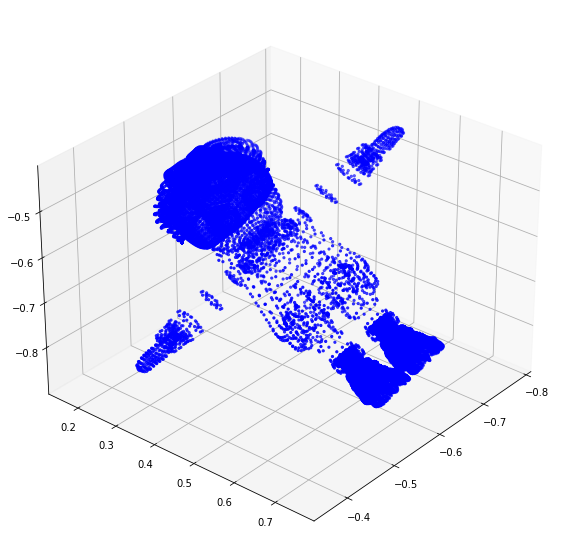

In [26]:
points_cloud = trimesh.PointCloud(vertices=mesh.vertices)

fig = plt.figure(figsize=(10, 10))
fx = plt.axes(projection='3d')
fx.view_init(elev=30, azim=40)
fx.scatter(points_cloud.vertices[:, 0], points_cloud.vertices[:, 1], points_cloud.vertices[:, 2], c='b', marker='.')
plt.show()

### Functional

In [8]:
%%time
center_mass = mesh.center_mass
query_points = np.array([[center_mass], [[3, 3, 3]]])
for point in query_points:
    print(
        "SDF{0} = {1}".format(point[0], mesh_to_sdf.mesh_to_sdf(mesh, point)[0])
)

SDF[ 0.37393226  0.58041264 -0.55011596] = 0.0023969863541424274
SDF[3. 3. 3.] = 4.801227569580078
CPU times: total: 9.97 s
Wall time: 29.2 s


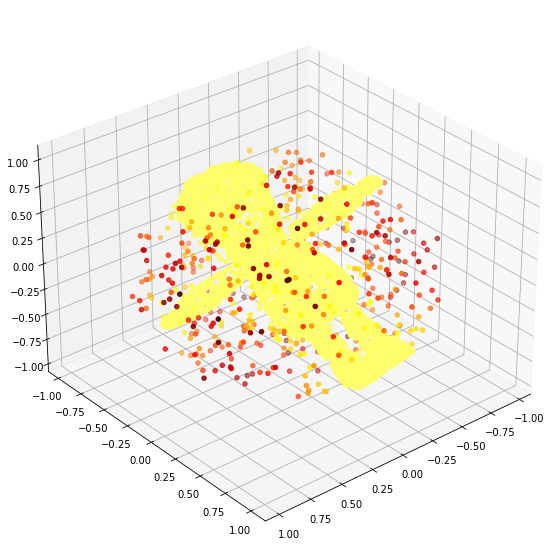

In [34]:
points, sdf = mesh_to_sdf.sample_sdf_near_surface(mesh, number_of_points=10000)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.view_init(elev=30, azim=50)
ax.scatter(points[:, 0], points[:, 1], zs=points[:, 2], c=sdf, cmap="hot_r")